##Features Exploration

This dataset consists of 11 features and a target variable. The dataset consists of 1191 patients.
Here is a detailed description of all the features:

1. Age: Age of patient in years (Numerical)
2. Sex: Gender of patient [Male - 1, Female - 0] 
3. Chest Pain Type: Type of chest pain experienced by patient - [1 typical, 2 typical angina, 3 non- anginal pain, 4 asymptomatic]
4. resting bp s: Level of blood pressure at resting mode in mm/HG (Numerical)
5. cholestrol: Serum cholestrol in mg/dl (Numerical)
6. fasting blood sugar: Blood sugar levels on fasting - [> 120 mg/dl is 1, less or equal than 120 mg/dl is 0.] 
7. resting ecg: Result of electrocardiogram while at rest - [0 : Normal 1: Abnormality in ST-T wave 2: Left ventricular hypertrophy]
8. max heart rate: The maximum heart rate achieved (Numerical)
9. exercise angina: Angina that was induced by exercise - [0 is NO,  1 is Yes]
10. oldpeak: Exercise induced ST-depression in comparison with the state of rest (Numerical)
11. ST slope: ST segment measured in terms of slope during peak exercise 0: Normal 1: Upsloping 2: Flat 3: Downsloping (Nominal)

Target variable
12. target: 1 - patient at heart disease risk, 0 - patient is not at a risk of suffering from a heart disease.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

import pickle

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Scikit-Learn Models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

# Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

     |████████████████████████████████| 67.3MB 52kB/s 


In [ ]:
preferred_colours = [
                    'lightblue',
                     'salmon',
                    'yellow']

sns.set_palette(preferred_colours)

In [ ]:
# Read in the dataset.
df = pd.read_csv("drive/My Drive/heart_failure/heart_dataset.csv", sep=",")

# Data Exploration


In [ ]:
# Are there any missing values?
df.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [ ]:
# Check the type of every features.
df.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

### We do not have any missing values
let's continue with our data exploration

In [ ]:
# Get the mean value of each feature
df.mean()

age                     53.720168
sex                      0.763866
chest pain type          3.232773
resting bp s           132.153782
cholesterol            210.363866
fasting blood sugar      0.213445
resting ecg              0.698319
max heart rate         139.732773
exercise angina          0.387395
oldpeak                  0.922773
ST slope                 1.624370
target                   0.528571
dtype: float64

We have inbalanced data in terms of sex. 909 men vs 281 female.

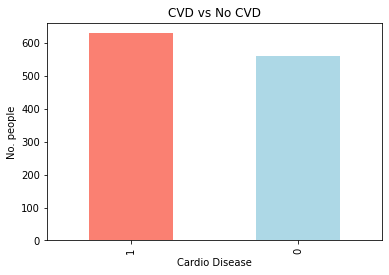

In [ ]:
#See how many people have cardio vascular disease 
df["target"].value_counts().plot(xlabel="Cardio Disease", ylabel="No. people",kind="bar",color=["salmon","lightblue"],title="CVD vs No CVD");


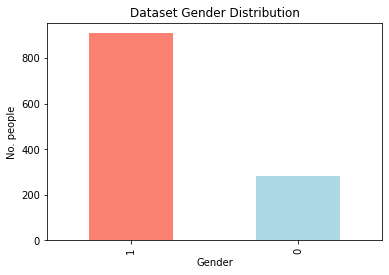

In [ ]:
# Plot the gender distribution of the dataset
df["sex"].value_counts().plot(xlabel="Gender", ylabel="No. people",kind="bar",color=["salmon","lightblue"],title="Dataset Gender Distribution");


In [ ]:
df.sex.value_counts()

1    909
0    281
Name: sex, dtype: int64

The dataset is pretty even. Almost half have cvd and other half do not.


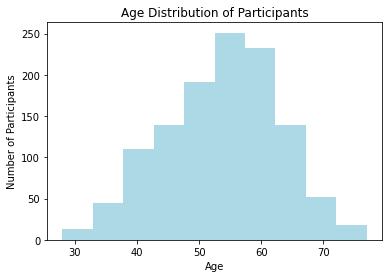

In [ ]:
fig, ax = plt.subplots()
ax.hist(df.age);
ax.set(title="Age Distribution of Participants",
      xlabel="Age",ylabel="Number of Participants");

In [ ]:
# Compare CVD with sex column.
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,211,350
1,70,559


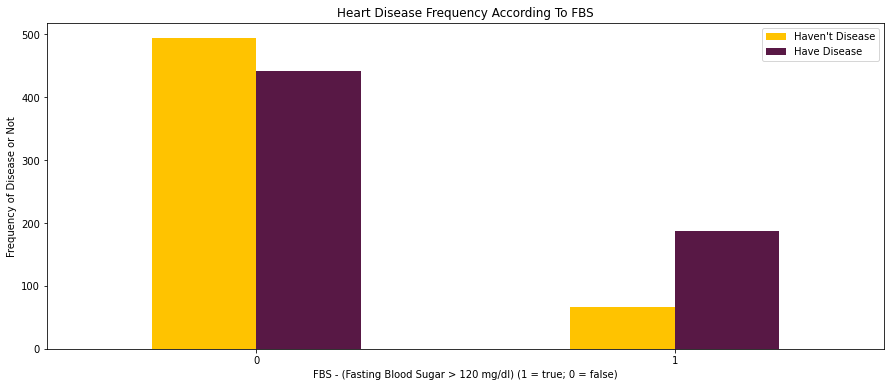

In [ ]:
# Plot heart disease frequency accoding to level of Fasting Blood Sugar
pd.crosstab(df["fasting blood sugar"],df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

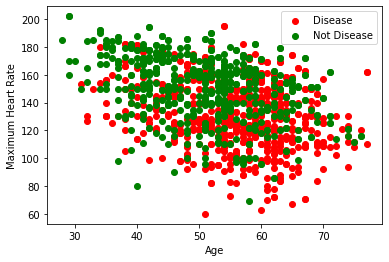

In [ ]:
# Scatter diagram of the maximum heart rate of healthy and CVD patients
plt.scatter(x=df.age[df.target==1], y=df["max heart rate"][(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df["max heart rate"][(df.target==0)], c = "green")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

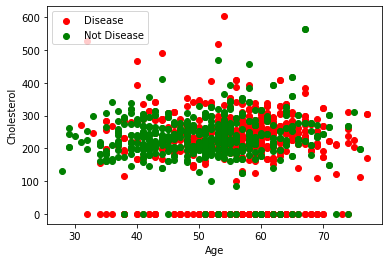

In [ ]:
# Scatter diagram of the cholesterol of healthy and CVD patients
plt.scatter(x=df.age[df.target==1], y=df["cholesterol"][(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df["cholesterol"][(df.target==0)], c = "green")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.show()


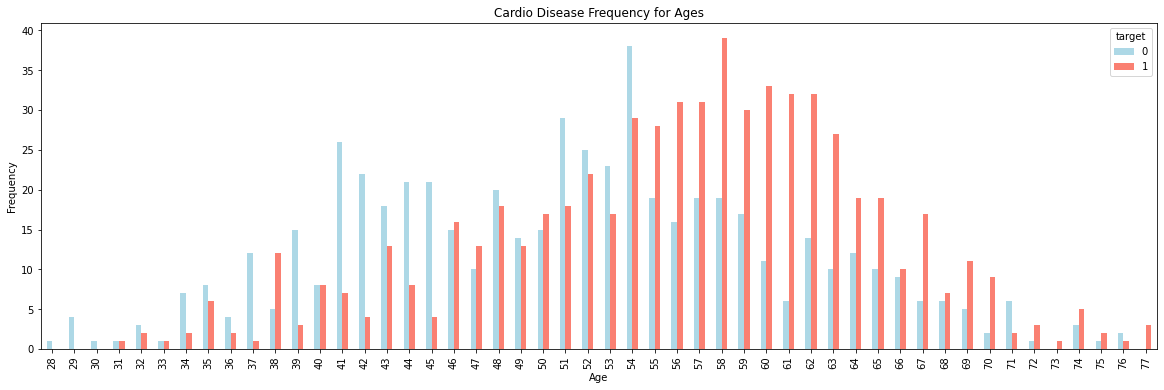

In [ ]:
# Cardio disease frequency between ages
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Cardio Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

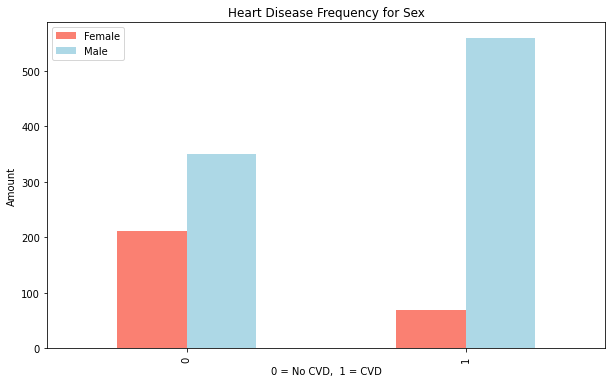

In [ ]:
# Bar chart showing the frequency of heart disease between sex.
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No CVD,  1 = CVD")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
# plt.xticks(rotation=0);

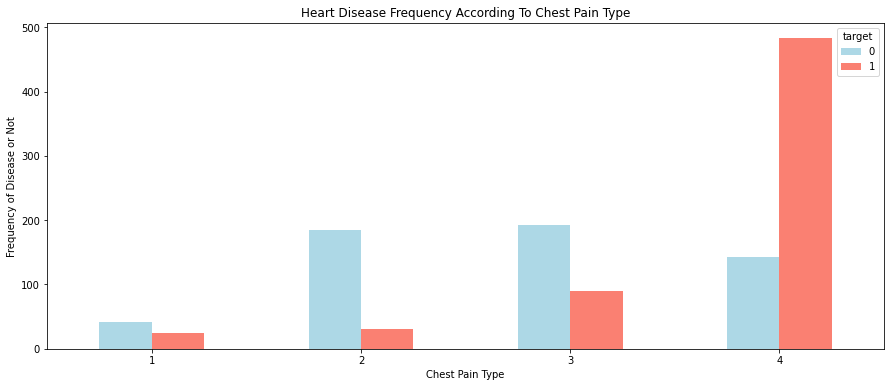

In [ ]:
# Heart disease frequency between the four different types of chest pain type.
pd.crosstab(df["chest pain type"],df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')


plt.show()

(12.5, -0.5)

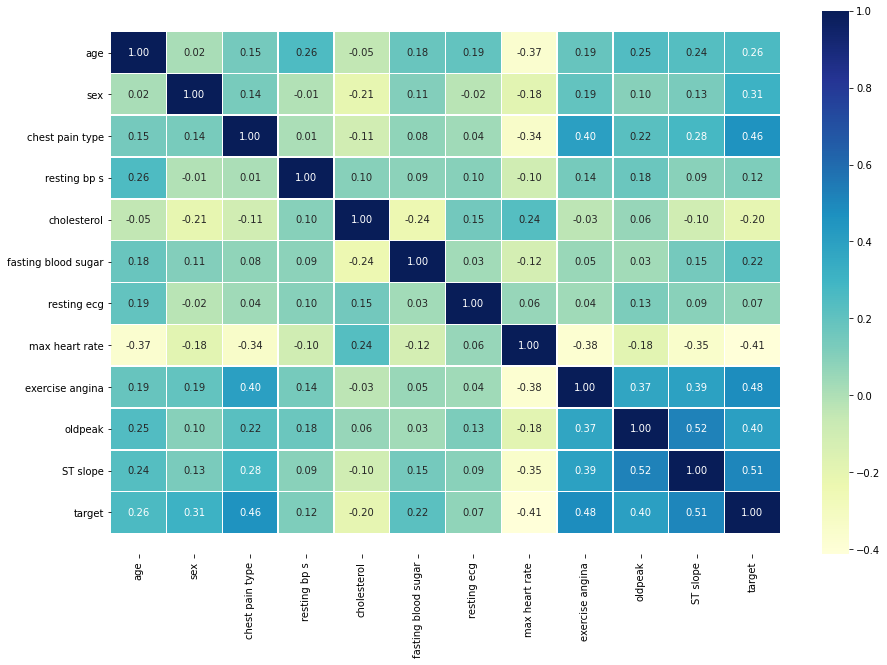

In [ ]:
# Correlation matrix
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(df.corr(),
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Fixing the dataset


In [ ]:

# Split data into X and y
X = df.drop("target", axis=1)

y = df["target"]

# Split data into train and test sets
np.random.seed(20)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [ ]:
X[X.cholesterol==0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
294,65,1,4,115,0,0,0,93,1,0.0,2
295,32,1,1,95,0,1,0,127,0,0.7,1
296,61,1,4,105,0,1,0,110,1,1.5,1
297,50,1,4,145,0,1,0,139,1,0.7,2
298,57,1,4,110,0,1,1,131,1,1.4,1
...,...,...,...,...,...,...,...,...,...,...,...
515,43,1,4,122,0,0,0,120,0,0.5,1
516,63,1,3,130,0,1,1,160,0,3.0,2
519,48,1,3,102,0,1,1,110,1,1.0,3
536,56,1,4,130,0,0,2,122,1,1.0,2


In [ ]:
# Replace 0's with NaN
X['cholesterol']=X['cholesterol'].replace(0,np.nan)

In [ ]:
# Made values 0 equal to NaN
X.isna().sum()

age                      0
sex                      0
chest pain type          0
resting bp s             0
cholesterol            172
fasting blood sugar      0
resting ecg              0
max heart rate           0
exercise angina          0
oldpeak                  0
ST slope                 0
dtype: int64

In [ ]:
# Impute missing values.
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
X =  pd.DataFrame(imputer.fit_transform(X),columns = X.columns)

In [ ]:
# Made values 0 equal to NaN
X.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
dtype: int64

In [ ]:
# See all the patients who gace cholesterol value of 0.
df[df.cholesterol==0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
294,65,1,4,115,0,0,0,93,1,0.0,2,1
295,32,1,1,95,0,1,0,127,0,0.7,1,1
296,61,1,4,105,0,1,0,110,1,1.5,1,1
297,50,1,4,145,0,1,0,139,1,0.7,2,1
298,57,1,4,110,0,1,1,131,1,1.4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
515,43,1,4,122,0,0,0,120,0,0.5,1,1
516,63,1,3,130,0,1,1,160,0,3.0,2,0
519,48,1,3,102,0,1,1,110,1,1.0,3,1
536,56,1,4,130,0,0,2,122,1,1.0,2,1


In [ ]:
# Assign the imputed values to the dataset.
df = df.assign(cholesterol=X['cholesterol'])

In [ ]:
# Check again to see if there are any patients with cholesterol value of 0 (check if the imputation worked).
df[df.cholesterol==0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target


In [ ]:
df.to_csv(r'ndataframe.csv', index = False)

# Initial training of the 5 models

In [ ]:
#Evaluate a model's accuracy.
def evaluate_accuracy(model, name):
  y_preds = model.predict(X_test)
  print("Evaluating different criteria for "+name)
  print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
  print(f"Precision: {precision_score(y_test, y_preds)}")
  print(f"Recall: {recall_score(y_test, y_preds)}")
  print(f"F1: {f1_score(y_test, y_preds)}")

In [ ]:
# Evaluate the accuracy of predictions
def evaluate_preds(y_test,y_preds):
    print("Evaluatiing different criteria for our model")
    print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
    print(f"Precision: {precision_score(y_test, y_preds)}")
    print(f"Recall: {recall_score(y_test, y_preds)}")
    print(f"F1: {f1_score(y_test, y_preds)}")
    return;

In [ ]:


# Function to fit and score models.
def fit_score_models(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates machine learning models passed in.
    """
    # Set random seed.
    np.random.seed(20)
    # Keep model scores in a dictionary.
    scores = {}
    # Loop through passed in models.
    for name, model in models.items():
        # Fit the model to the data.
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to scores dictionary.
        scores[name] = model.score(X_test, y_test)
    return scores

In [ ]:

# Dictionary with various models inside, used to train different models with the same code.
models = { "Random Forests": RandomForestClassifier(), "Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "XGBoost": XGBClassifier(), "Catboost": CatBoostClassifier()}

model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Learning rate set to 0.010088
0:	learn: 0.6841729	total: 51.7ms	remaining: 51.6s
1:	learn: 0.6763677	total: 53.5ms	remaining: 26.7s
2:	learn: 0.6688408	total: 55.1ms	remaining: 18.3s
3:	learn: 0.6614868	total: 56.7ms	remaining: 14.1s
4:	learn: 0.6533946	total: 58.3ms	remaining: 11.6s
5:	learn: 0.6458304	total: 59.9ms	remaining: 9.92s
6:	learn: 0.6390572	total: 61.4ms	remaining: 8.71s
7:	learn: 0.6323767	total: 63.2ms	remaining: 7.83s
8:	learn: 0.6246190	total: 64.7ms	remaining: 7.12s
9:	learn: 0.6178588	total: 66.3ms	remaining: 6.56s
10:	learn: 0.6123032	total: 67.8ms	remaining: 6.1s
11:	learn: 0.6051208	total: 69.5ms	remaining: 5.72s
12:	learn: 0.6002488	total: 70.8ms	remaining: 5.38s
13:	learn: 0.5936667	total: 72.4ms	remaining: 5.1s
14:	learn: 0.5876103	total: 74.2ms	remaining: 4.87s
15:	learn: 0.5810177	total: 75.9ms	remaining: 4.67s
16:	learn: 0.5761187	total: 77.5ms	remaining: 4.48s
17:	learn: 0.5696629	total: 79.4ms	remaining: 4.33s
18:	learn: 0.5645376	total: 81.2ms	remaining: 

{'Catboost': 0.9201680672268907,
 'KNN': 0.6974789915966386,
 'Logistic Regression': 0.8319327731092437,
 'Random Forests': 0.9411764705882353,
 'XGBoost': 0.8865546218487395}

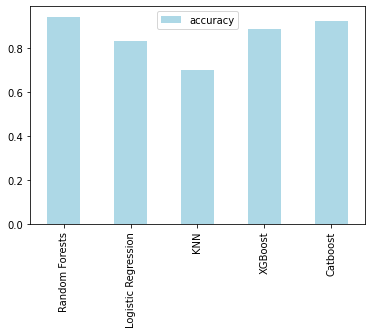

In [ ]:
# Plot of the distribution of accuracy between the models.
diff_scores = pd.DataFrame(model_scores, index=["accuracy"])
diff_scores.T.plot.bar();

# Random Forest Tuning


In [ ]:
#Inititalize Random Forest Classifier
rf = RandomForestClassifier()

np.random.seed(20)
#Fit the model to the data
rf.fit(X_train, y_train)

#Make predictions with probabilities
y_probs = rf.predict_proba(X_test)

y_probs_positive = y_probs[:,1]

#Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

#Check the false positive rates
fpr

array([0.  , 0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.03, 0.03,
       0.03, 0.03, 0.03, 0.03, 0.03, 0.04, 0.04, 0.04, 0.04, 0.04, 0.05,
       0.07, 0.08, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.11,
       0.13, 0.13, 0.14, 0.16, 0.17, 0.17, 0.18, 0.2 , 0.21, 0.23, 0.26,
       0.28, 0.29, 0.31, 0.33, 0.37, 0.42, 0.49, 0.5 , 0.53, 0.55, 0.56,
       0.64, 0.7 , 0.77, 0.89, 1.  ])

In [ ]:
# Evaluate accuracy of the RF before tuning
evaluate_accuracy(rf, "Random Forest Before")

Evaluating different criteria for Random Forest Before
Accuracy: 94.12%
Precision: 0.9305555555555556
Recall: 0.9710144927536232
F1: 0.9503546099290779


In [ ]:
#ROC_AUC score for RF
roc_auc_score(y_test, y_probs_positive)

0.9641666666666666

In [ ]:
# Parameters to try.
params ={
"n_estimators" : [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
"max_features" : ['auto', 'sqrt'],
"max_depth" : [int(x) for x in np.linspace(10, 110, num = 11)],
"min_samples_split" : [2, 5, 10],
"min_samples_leaf" : [1, 2, 4],
"bootstrap" : [True, False]
}
np.random.seed(20)

# Tune algorithm. Cross-validate 5 times.
rf_tuned= RandomizedSearchCV(estimator=rf, param_distributions = params, 
                              scoring='roc_auc', n_iter=100,cv = 5,  verbose = 3)
                               
rf_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True, score=0.962, total=   1.6s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True, score=0.955, total=   1.6s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True, score=0.911, total=   1.6s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True, score=0.967, total=   1.6s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True, score=0.954, total=   1.6s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False, score=0.964, total=   1.8s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_de

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 15.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
# Evaluate RF after tuning.
evaluate_accuracy(rf_tuned,"Random Forests After")

Evaluating different criteria for Random Forests After
Accuracy: 92.86%
Precision: 0.935251798561151
Recall: 0.9420289855072463
F1: 0.9386281588447652


In [ ]:
# Export the original RF model (before tuning) as it performed better.
filename = 'random_forest.pkl'
pickle.dump(rf, open(filename, 'wb'))

# XGBoost

## ROC-AUC XGBoost

In [ ]:
xg = XGBClassifier()

np.random.seed(20)
xg.fit(X_train, y_train)

#Make predictions with probabilities
y_probs = xg.predict_proba(X_test)

y_probs_positive = y_probs[:,1]

#Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

#Check the false positive rates
fpr

array([0.  , 0.  , 0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02,
       0.03, 0.03, 0.04, 0.04, 0.05, 0.05, 0.06, 0.06, 0.06, 0.08, 0.08,
       0.09, 0.09, 0.1 , 0.1 , 0.11, 0.11, 0.14, 0.14, 0.16, 0.16, 0.2 ,
       0.2 , 0.21, 0.21, 0.23, 0.25, 0.27, 0.27, 0.29, 0.31, 0.32, 0.32,
       0.35, 0.35, 0.36, 0.36, 0.49, 0.51, 0.55, 0.55, 0.61, 0.61, 0.71,
       0.73, 1.  ])

In [ ]:
#Evaluate XGBoost before tuning
evaluate_accuracy(xg, "XGBoost Before")

Evaluating different criteria for XGBoost Before
Accuracy: 88.66%
Precision: 0.9236641221374046
Recall: 0.8768115942028986
F1: 0.8996282527881041


In [ ]:
# Get XGBoost ROC_AUC score before tuning
roc_auc_score(y_test, y_probs_positive)

0.9485507246376812

## Tuning of XGBoost

In [ ]:
# Tune algorithm.
# Parameters to try.
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

xg_tuned = GridSearchCV(xg, param_grid=params, scoring='roc_auc', n_jobs=-1,cv=5,verbose=3)
np.random.seed(42)
xg_tuned.fit(X_train,y_train)

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 994 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 1570 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2274 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3106 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 4066 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 5154 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 6370 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 7714 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 9186 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 10786 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 12514 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 14370 tasks     

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_po..., seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.05, 0.1, 0.15

In [ ]:
# Evaluate accuracy of XGBoost after tuning
evaluate_accuracy(xg_tuned,"XGBoost after tuning")

Evaluating different criteria for XGBoost after tuning
Accuracy: 92.44%
Precision: 0.9477611940298507
Recall: 0.9202898550724637
F1: 0.9338235294117647


In [ ]:
# ROC_AUC score of XGBoost after tuning
xg_tuned.score(X_test, y_test)

0.9656521739130434

In [ ]:
# Export the tuned XGBoost model as it performed better.
filename = 'xg_boost_clf.pkl'
pickle.dump(xg_tuned, open(filename, 'wb'))


# Catboost

In [ ]:

cat = CatBoostClassifier()

np.random.seed(20)
cat.fit(X_train, y_train)

#Make predictions with probabilities
y_probs = cat.predict_proba(X_test)

y_probs_positive = y_probs[:,1]

#Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

#Check the false positive rates
fpr

Learning rate set to 0.010088
0:	learn: 0.6841729	total: 1.84ms	remaining: 1.84s
1:	learn: 0.6763677	total: 3.16ms	remaining: 1.58s
2:	learn: 0.6688408	total: 4.52ms	remaining: 1.5s
3:	learn: 0.6614868	total: 5.83ms	remaining: 1.45s
4:	learn: 0.6533946	total: 7.14ms	remaining: 1.42s
5:	learn: 0.6458304	total: 8.48ms	remaining: 1.4s
6:	learn: 0.6390572	total: 9.85ms	remaining: 1.4s
7:	learn: 0.6323767	total: 11.2ms	remaining: 1.39s
8:	learn: 0.6246190	total: 12.6ms	remaining: 1.38s
9:	learn: 0.6178588	total: 13.9ms	remaining: 1.37s
10:	learn: 0.6123032	total: 15.2ms	remaining: 1.36s
11:	learn: 0.6051208	total: 16.5ms	remaining: 1.36s
12:	learn: 0.6002488	total: 17.5ms	remaining: 1.33s
13:	learn: 0.5936667	total: 18.9ms	remaining: 1.33s
14:	learn: 0.5876103	total: 20.2ms	remaining: 1.33s
15:	learn: 0.5810177	total: 21.5ms	remaining: 1.32s
16:	learn: 0.5761187	total: 23ms	remaining: 1.33s
17:	learn: 0.5696629	total: 24.2ms	remaining: 1.32s
18:	learn: 0.5645376	total: 29.8ms	remaining: 1.5

array([0.  , 0.  , 0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02,
       0.03, 0.03, 0.05, 0.05, 0.05, 0.05, 0.07, 0.07, 0.08, 0.08, 0.09,
       0.09, 0.1 , 0.1 , 0.16, 0.18, 0.18, 0.2 , 0.2 , 0.2 , 0.22, 0.22,
       0.28, 0.3 , 0.33, 0.33, 0.35, 0.35, 0.5 , 0.52, 0.64, 0.64, 0.74,
       0.76, 1.  ])

In [ ]:
# Evaluate accuracy of Catboost before tuning
evaluate_accuracy(cat, "Cat Before")

Evaluating different criteria for Cat Before
Accuracy: 92.02%
Precision: 0.9343065693430657
Recall: 0.927536231884058
F1: 0.9309090909090909


In [ ]:
# Get ROC_AUC score of Catboost before tuning
roc_auc_score(y_test, y_probs_positive)

0.9525362318840579

In [ ]:
# Catboost hyperparameter tuning
# Parameters to try.
parameters = {'depth':[3,1,2,6,4,5,7,8,9,10],
          'iterations':[250,100,500,1000],
          'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
          'l2_leaf_reg':[3,1,5,10,100],
          'border_count':[32,5,10,20,50,100,200]}

# Tune algorithm
cat_tuned = RandomizedSearchCV(estimator=cat, param_distributions = parameters, 
                              scoring='roc_auc', n_iter=100,cv = 5,  verbose = 3)   
np.random.seed(42)               
cat_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] learning_rate=0.1, l2_leaf_reg=3, iterations=100, depth=3, border_count=32 
0:	learn: 0.6512900	total: 515us	remaining: 51ms
1:	learn: 0.6240727	total: 957us	remaining: 46.9ms
2:	learn: 0.6013860	total: 1.28ms	remaining: 41.6ms
3:	learn: 0.5767747	total: 1.67ms	remaining: 40.1ms
4:	learn: 0.5587348	total: 2.02ms	remaining: 38.4ms
5:	learn: 0.5406988	total: 2.35ms	remaining: 36.8ms
6:	learn: 0.5247348	total: 2.69ms	remaining: 35.7ms
7:	learn: 0.5106907	total: 3.01ms	remaining: 34.6ms
8:	learn: 0.4990677	total: 3.34ms	remaining: 33.7ms
9:	learn: 0.4874778	total: 3.69ms	remaining: 33.2ms
10:	learn: 0.4754938	total: 4.09ms	remaining: 33.1ms
11:	learn: 0.4671223	total: 4.44ms	remaining: 32.6ms
12:	learn: 0.4589474	total: 5ms	remaining: 33.5ms
13:	learn: 0.4514255	total: 5.57ms	remaining: 34.2ms
14:	learn: 0.4436270	total: 6.3ms	remaining: 35.7ms
15:	learn: 0.4389606	total: 6.88ms	remaining: 36.1ms
16:	learn: 0.4331117	total

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


85:	learn: 0.3049141	total: 63.2ms	remaining: 10.3ms
86:	learn: 0.3048921	total: 63.7ms	remaining: 9.52ms
87:	learn: 0.3037925	total: 64ms	remaining: 8.73ms
88:	learn: 0.3030080	total: 64.3ms	remaining: 7.95ms
89:	learn: 0.3025838	total: 64.9ms	remaining: 7.21ms
90:	learn: 0.3024193	total: 65.4ms	remaining: 6.47ms
91:	learn: 0.3020147	total: 66ms	remaining: 5.74ms
92:	learn: 0.3014524	total: 66.6ms	remaining: 5.01ms
93:	learn: 0.3013599	total: 67.2ms	remaining: 4.29ms
94:	learn: 0.3008662	total: 67.7ms	remaining: 3.56ms
95:	learn: 0.3004278	total: 68.3ms	remaining: 2.85ms
96:	learn: 0.3003404	total: 68.8ms	remaining: 2.13ms
97:	learn: 0.3002357	total: 69.3ms	remaining: 1.41ms
98:	learn: 0.2998744	total: 69.8ms	remaining: 705us
99:	learn: 0.2991599	total: 70.4ms	remaining: 0us
[CV]  learning_rate=0.1, l2_leaf_reg=3, iterations=100, depth=3, border_count=32, score=0.915, total=   0.1s
[CV] learning_rate=0.1, l2_leaf_reg=3, iterations=100, depth=3, border_count=32 
0:	learn: 0.6481577	tot

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
97:	learn: 0.2324076	total: 81.7ms	remaining: 752ms
98:	learn: 0.2315294	total: 82.5ms	remaining: 751ms
99:	learn: 0.2307500	total: 83.3ms	remaining: 750ms
100:	learn: 0.2296697	total: 84ms	remaining: 748ms
101:	learn: 0.2289257	total: 84.7ms	remaining: 746ms
102:	learn: 0.2276477	total: 85.5ms	remaining: 745ms
103:	learn: 0.2259881	total: 86.3ms	remaining: 743ms
104:	learn: 0.2242934	total: 87.1ms	remaining: 742ms
105:	learn: 0.2240960	total: 87.8ms	remaining: 740ms
106:	learn: 0.2231436	total: 88.5ms	remaining: 739ms
107:	learn: 0.2219170	total: 89.5ms	remaining: 739ms
108:	learn: 0.2202228	total: 90.2ms	remaining: 737ms
109:	learn: 0.2201681	total: 91.1ms	remaining: 737ms
110:	learn: 0.2194630	total: 91.9ms	remaining: 736ms
111:	learn: 0.2179920	total: 92.7ms	remaining: 735ms
112:	learn: 0.2179471	total: 93.4ms	remaining: 733ms
113:	learn: 0.2177016	total: 94.2ms	remaining: 732ms
114:	learn: 0.2163450	total: 95.2ms	remaining: 733ms


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  7.9min finished


88:	learn: 0.1356645	total: 174ms	remaining: 314ms
89:	learn: 0.1340778	total: 178ms	remaining: 317ms
90:	learn: 0.1326200	total: 183ms	remaining: 319ms
91:	learn: 0.1313724	total: 189ms	remaining: 325ms
92:	learn: 0.1299813	total: 193ms	remaining: 326ms
93:	learn: 0.1285277	total: 196ms	remaining: 326ms
94:	learn: 0.1270652	total: 202ms	remaining: 329ms
95:	learn: 0.1260704	total: 203ms	remaining: 326ms
96:	learn: 0.1245750	total: 205ms	remaining: 323ms
97:	learn: 0.1230852	total: 207ms	remaining: 322ms
98:	learn: 0.1215593	total: 209ms	remaining: 320ms
99:	learn: 0.1203767	total: 211ms	remaining: 317ms
100:	learn: 0.1193599	total: 213ms	remaining: 314ms
101:	learn: 0.1180032	total: 215ms	remaining: 312ms
102:	learn: 0.1168014	total: 217ms	remaining: 309ms
103:	learn: 0.1155231	total: 218ms	remaining: 307ms
104:	learn: 0.1144136	total: 220ms	remaining: 304ms
105:	learn: 0.1132489	total: 222ms	remaining: 302ms
106:	learn: 0.1122635	total: 224ms	remaining: 299ms
107:	learn: 0.1111319	to

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7f27f7096ed0>,
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'border_count': [32, 5, 10, 20, 50, 100,
                                                         200],
                                        'depth': [3, 1, 2, 6, 4, 5, 7, 8, 9,
                                                  10],
                                        'iterations': [250, 100, 500, 1000],
                                        'l2_leaf_reg': [3, 1, 5, 10, 100],
                                        'learning_rate': [0.03, 0.001, 0.01,
                                                          0.1, 0.2, 0.3]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='roc_auc', verbose=3)

In [ ]:
# ROC_AUC score of Catboost after tuning - since scoring used was ROC_AUC.
cat_tuned.score(X_test,y_test)

0.9678260869565217

In [ ]:
# Evaluate Catboost after tuning.
evaluate_accuracy(cat_tuned, "CatBoost after tuning")

Evaluating different criteria for CatBoost after tuning
Accuracy: 92.02%
Precision: 0.9219858156028369
Recall: 0.9420289855072463
F1: 0.9318996415770608


In [ ]:
# Export the tuned Catboost model as it performed better.
filename = 'catboost.pkl'
pickle.dump(cat_tuned, open(filename, 'wb'))

# Load the best models

> Used for doing tests without rerunning all the algorithms again.



In [ ]:
# Load XGBoost.
path = "drive/My Drive/heart_failure/xg_boost_clf.pkl"
xg_in = pickle.load(open(path, 'rb'))
evaluate_accuracy(xg_in,"XGBoost")

Evaluating different criteria for XGBoost
Accuracy: 92.44%
Precision: 0.9477611940298507
Recall: 0.9202898550724637
F1: 0.9338235294117647


In [ ]:
# Load RF.
path = "drive/My Drive/heart_failure/random_forest.pkl"
rf_in = pickle.load(open(path, 'rb'))
result = rf_in.score(X_test, y_test)
evaluate_accuracy(rf_in, "Random Forests")

Evaluating different criteria for Random Forests
Accuracy: 94.12%
Precision: 0.9305555555555556
Recall: 0.9710144927536232
F1: 0.9503546099290779


In [ ]:
# Load Catboost.
path = "drive/My Drive/heart_failure/catboost.pkl"
cat_in = pickle.load(open(path, 'rb'))
result = cat_in.score(X_test, y_test)
evaluate_accuracy(cat_in, "Catboost")

Evaluating different criteria for Catboost
Accuracy: 92.02%
Precision: 0.9219858156028369
Recall: 0.9420289855072463
F1: 0.9318996415770608


# Create Explainer of the Best Model


> Use LIME to create an explainer of RF, the best model.



In [ ]:
# # Install lime
!pip install lime

     |████████████████████████████████| 276kB 7.6MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp37-none-any.whl size=283846 sha256=2dfb6f32be479439db0f85c8e52109899af89fd82bc835d944e8622f4b611c2e
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [ ]:
# Explainable AI with Lime
import lime
from lime import lime_tabular

# Create explainer.
explainer = lime_tabular.LimeTabularExplainer(
    training_data = np.array(X_train),
    feature_names = X_train.columns,
    class_names=['Healthy', 'Cardio'],
    mode='classification'
)

In [ ]:
X_test.iloc[90]

age                     66.0
sex                      0.0
chest pain type          4.0
resting bp s           155.0
cholesterol              0.0
fasting blood sugar      1.0
resting ecg              0.0
max heart rate          90.0
exercise angina          0.0
oldpeak                  0.0
ST slope                 2.0
Name: 416, dtype: float64

In [ ]:
y_test.iloc[90]

1

In [ ]:
# Test LIME explainer.
exp = explainer.explain_instance(
    data_row = X_test.iloc[90],
    predict_fn = rf_in.predict_proba
)
exp.show_in_notebook(show_table=True)

In [ ]:
# Export explainer instance - to be utilised in the web platform.
import dill
with open("explainer.pkl", 'wb') as f: dill.dump(explainer, f)

# Evaluation


## Plotting Validation Curves

In [ ]:
# RANDOM FOREST
#Make predictions with probabilities
y_probs = rf_in.predict_proba(X_test)
y_probs_positive = y_probs[:,1]

#Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

#Check the false positive rates
fpr

array([0.  , 0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.03, 0.03,
       0.03, 0.03, 0.03, 0.03, 0.03, 0.04, 0.04, 0.04, 0.04, 0.04, 0.05,
       0.07, 0.08, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.11,
       0.13, 0.13, 0.14, 0.16, 0.17, 0.17, 0.18, 0.2 , 0.21, 0.23, 0.26,
       0.28, 0.29, 0.31, 0.33, 0.37, 0.42, 0.49, 0.5 , 0.53, 0.55, 0.56,
       0.64, 0.7 , 0.77, 0.89, 1.  ])

In [ ]:
# XGBOOST
#Make predictions with probabilities
y_probs_xg = xg_in.predict_proba(X_test)
y_probs_positive_xg = y_probs_xg[:,1]

#Calculate fpr, tpr and thresholds
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_probs_positive_xg)

#Check the false positive rates
fpr1

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.02, 0.02, 0.02, 0.02,
       0.03, 0.03, 0.04, 0.04, 0.05, 0.05, 0.05, 0.06, 0.06, 0.07, 0.07,
       0.09, 0.09, 0.11, 0.13, 0.13, 0.15, 0.15, 0.15, 0.18, 0.2 , 0.29,
       0.29, 0.35, 0.35, 0.5 , 0.5 , 0.58, 0.6 , 0.86, 0.88, 1.  ])

In [ ]:
# CATBOOST
#Make predictions with probabilities
y_probs_cat = cat_in.predict_proba(X_test)
y_probs_positive_cat = y_probs_cat[:,1]

#Calculate fpr, tpr and thresholds
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_probs_positive_cat)

#Check the false positive rates
fpr2

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.01, 0.01, 0.02, 0.02,
       0.03, 0.03, 0.04, 0.04, 0.05, 0.05, 0.06, 0.06, 0.08, 0.08, 0.08,
       0.08, 0.09, 0.09, 0.11, 0.11, 0.11, 0.11, 0.13, 0.13, 0.14, 0.14,
       0.19, 0.21, 0.46, 0.48, 0.7 , 0.7 , 0.93, 0.95, 1.  ])

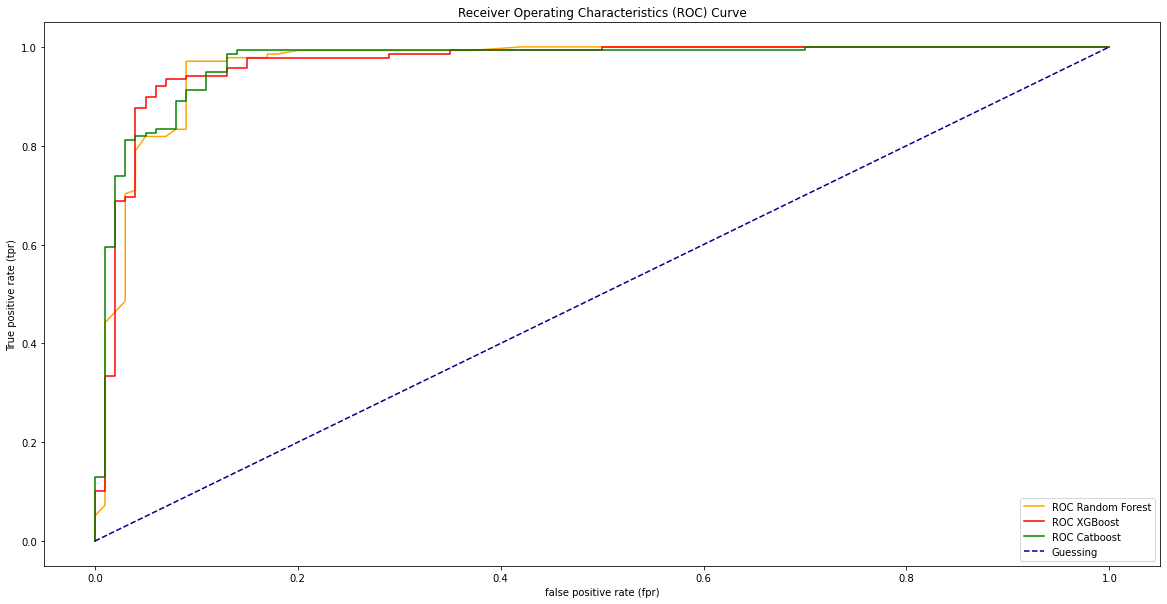

In [ ]:
# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, fpr1, tpr1, fpr2, tpr2):
    
  #Plot roc curve
  plt.figure(figsize=(20,10))
  plt.plot(fpr, tpr, color="orange", label="ROC Random Forest")
  plt.plot(fpr1, tpr1, color="red", label="ROC XGBoost")
  plt.plot(fpr2, tpr2, color="green", label="ROC Catboost")
  #Plot line with no predictive power (baseline)
  plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
  
  #Customize the plot
  plt.xlabel("false positive rate (fpr)")
  plt.ylabel("True positive rate (tpr)")
  plt.title("Receiver Operating Characteristics (ROC) Curve")
  plt.legend()
  plt.show()


#Call function
plot_roc_curve(fpr,tpr, fpr1, tpr1,fpr2,tpr2)

## Confusion Matrix Evaluation


In [ ]:
from sklearn.metrics import confusion_matrix

#Make predictions.
y_preds_rf= rf_in.predict(X_test)
y_preds_xg = xg_in.predict(X_test)
y_preds_cat = cat_in.predict(X_test)

#Create a confusion matrix
conf_mat_rf = confusion_matrix(y_test, y_preds_rf)
conf_mat_xg = confusion_matrix(y_test, y_preds_xg)
conf_mat_cat = confusion_matrix(y_test, y_preds_cat)

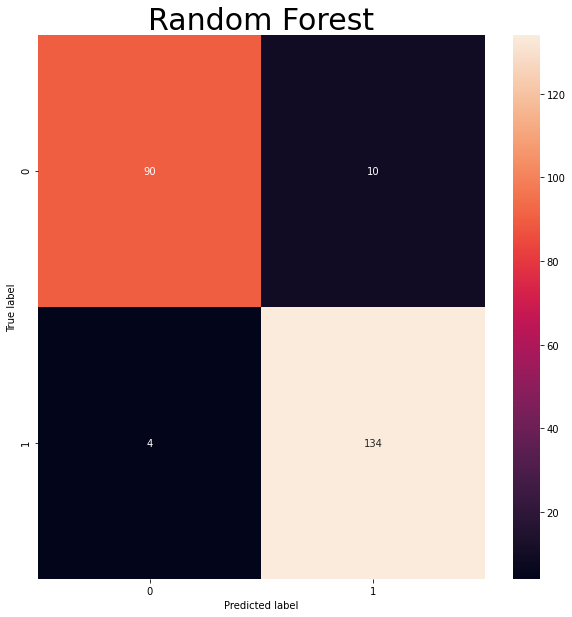

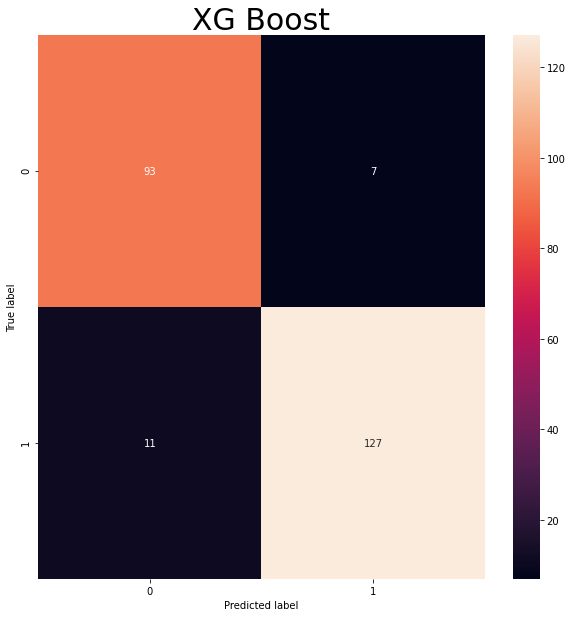

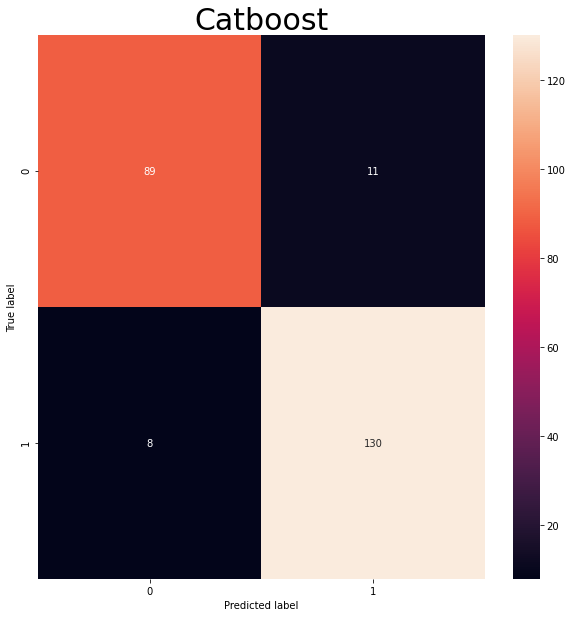

In [ ]:
# Function that plots a confusion matrix
def plot_conf_mat(conf_mat,name):
	
	fig,ax = plt.subplots(figsize=(10,10))
	ax = sns.heatmap(conf_mat, annot=True, cbar=True, fmt="d")
	plt.title(name , fontsize=30)
	plt.xlabel("Predicted label")
	plt.ylabel("True label");


#Call the function
plot_conf_mat(conf_mat_rf, "Random Forest")
plot_conf_mat(conf_mat_xg, "XG Boost")
plot_conf_mat(conf_mat_cat, "Catboost")